# Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another

    - Average of 15-25% annual churn rate
    - Costs 5-10 times more to acquire a new customer than to retain an existing one
    - Retaining high profitable customers is the number one business goal
    - To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

# Aim
In this project, you will analyse customer-level data of a leading telecom firm

    - Build predictive models to identify customers at high risk of churn
    - Identify the main indicators of churn.

# Understanding and Defining Churn

Two main models of payment in the telecom industry

    - Postpaid (customers pay a monthly/annual bill after using the services) 
    - Prepaid (customers pay/recharge with a certain amount in advance and then use the services)

Churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully<br/>

**Prepaid - most common model in India and southeast Asia<br/>**
Postpaid - more common in Europe in North America<br/>

**This project is based on the Indian and Southeast Asian market.**

# Definitions of Churn

There are various ways to define churn, such as:
    
**Revenue-based churn:** Customers who have not utilised any revenue-generating
facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.
One could also use aggregate metrics such as ‘customers who have generated less than
INR 4 per month in total/average/median revenue’

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the **usage-based definition to define churn**

# High-value Churn
In the Indian and the southeast Asian market

- **Approximately 80% of revenue comes from the top 20% customers** (called high-value customers)
- If we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage

In this project, you will define high-value customers based on a certain metric (mentioned later below)
and predict churn only on high-value customers

# Understanding the Business Objective and the Data

The dataset contains 
**customer-level information for four consecutive months - June, July, August and September**<br/>
**The months are encoded as 6, 7, 8 and 9 respectively**<br/>

The business objective is to **predict the churn in the last (i.e. the nineth) month using the data (features) from the first three months**

To do this task well, understanding the typical customer behaviour during churn will be helpful.

# Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, 
but rather over a period of time (this is especially applicable to high-value customers). 
In churn prediction, we assume that there are three phases of customer lifecycle :
    
    1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
    
    2. The ‘action’ phase: The customer experience starts to sore in this phase, 
        for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, 
        becomes unhappy with service quality etc. In this phase, the customer usually shows
        different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk 
        customers in this phase, since some corrective actions can be taken at this point 
        (such as matching the competitor’s offer/improving the service quality etc.)
        
    3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based
        on this phase. Also, it is important to note that at the time of prediction (i.e. the action months),
        this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase,
        you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase,
the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Data Preparation
The following data preparation steps are crucial for this problem:

**1. Derive new features**
This is one of the most important parts of data preparation since good features are often 
the differentiators between good and bad models. Use your business understanding to derive 
features you think could be important indicators of churn.

**2. Filter high-value customers**
As mentioned above, you need to predict churn only for the high-value customers. Define high-value 
customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 
70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

**3. Tag churners and remove attributes of the churn phase**
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

# Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:
    
- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase).
By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used to identify important variables that are strong predictors of churn.
These variables may also indicate why customers choose to switch to other networks.


In some cases, both of the above-stated goals can be achieved by a single machine learning model.
But here, you have a large number of attributes, and thus you should try using a dimensionality reduction
technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance)
- try using techniques to handle class imbalance. 

You can take the following suggestive steps to build the model:
    
- Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

- Conduct appropriate exploratory analysis to extract useful insights (whether directly 
  useful for business or for eventual modelling/feature engineering).

- Derive new features.

- Reduce the number of variables using PCA.

- Train a variety of models, tune model hyperparameters, etc. 
  (handle class imbalance using appropriate techniques).

- Evaluate the models using appropriate evaluation metrics. 
  Note that it is more important to identify churners than the non-churners accurately - 
    choose an appropriate evaluation metric which reflects this business goal.

- Finally, choose a model based on some evaluation metric.
    
    

# Import Data Dictionary

In [434]:
#import pandas & numpy

import pandas as pd
import numpy as np

In [435]:
#Load data diction
dataDictionary = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx', sheet_name='Sheet1')

#Display the dataDictionary Dataframe
dataDictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), 
IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), 
T2O (telecom operator to another operator), RECH (recharge) etc.


The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

The above model will only be able to achieve one of the two goals - to predict customers who will churn.
You can’t use the above model to identify the important features for churn. 
That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help
the business understand indicators of churn. A good choice to identify important variables is a logistic regression
model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. 
- whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.

# Data Understanding & Exploration

Import the Telecom churn data csv file & explore

In [436]:
#Importing Telecom csv file
telecom = pd.read_csv('telecom_churn_data.csv')

#Display the top 5 rows in telecom dataframe
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [437]:
#check the number of rows & columns in the dataframe
telecom.shape

(99999, 226)

In [438]:
#display max rows

pd.set_option('display.max_rows', telecom.shape[0])

In [439]:
#display the list of columns in telecom churn data

list(telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [440]:
#checking the telecom data file churn data

telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [441]:
# Function to check missing value percentage
def missingPercentage(df):
    print(round(100 * (df.isnull().sum()/df.shape[0]), 2))

#missing value percentage
missingPercentage(telecom)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Workflow:

* Use the 6 and 7 month data to find the high paying user.
* Use the 9th month data to label the numbers as churn and not churn.
* Drop the 9th month data away
* Impute the missing values in Dataframe & clean it
* Derive the required variables from 8th month column
* Train Test split
* PCA
* Train - Sort out class imbalance
* Modelling 1 - High Predictive model - to identify customers at high risk of churn
* Modelling 2 - Interpretable model - to identify the main indicators of churn

# Filter high value customers

**Take 6th month & 7th month data to Filter high value customer**<br/>
Those who have recharged with an amount more than or equal to X,<br/>
where X is the 70th percentile of the average recharge amount in the first two months (the good phase)<br/>

Average of Data & Call recharge in 6th & 7th month

In [442]:
#Filter the 6th month columns

telecom.columns[telecom.columns.str.contains('6')]

Index(['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6',
       'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user

Checking missing values in the above columns for 6th & 7th month

In [443]:
#missing values in total recharge amount for call in 6th month
print(telecom['total_rech_amt_6'].isnull().sum())

#missing values in Average data recharge amount in 6th month
print(telecom['av_rech_amt_data_6'].isnull().sum())

#missing values in of times data recharge in 6th month
print(telecom['total_rech_data_6'].isnull().sum())

0
74846
74846


In [444]:
#missing values in total recharge amount for call in 7th month
print(telecom['total_rech_amt_7'].isnull().sum())

#missing values in Average data recharge amount in 7th month
print(telecom['av_rech_amt_data_7'].isnull().sum())

#missing values in of times data recharge in 7th month
print(telecom['total_rech_data_7'].isnull().sum())

0
74428
74428


Missing values in 'av_rech_amt_data_7' & 'total_rech_data_7' column means that the 
**user hasn't recharged anything at that month.** So, we can impute those missing values with 0

In [445]:
# Formula
# Total recharge amount = (number of times data recharge done * average recharge amount) + (total recharge done for call)

# total recharge done on 6th month
telecom['total_rech_6'] = (telecom['total_rech_data_6'].fillna(0) * telecom['av_rech_amt_data_6'].fillna(0)) + telecom['total_rech_amt_6']

#total recharge done on 7th month
telecom['total_rech_7'] = (telecom['total_rech_data_7'].fillna(0) * telecom['av_rech_amt_data_7'].fillna(0)) + telecom['total_rech_amt_7']


In [446]:
# Average of total recharge done by the customer in 6th & 7th month

telecom['total_rech_6_7'] = (telecom['total_rech_6'] + telecom['total_rech_7']) / 2

In [447]:
# Describe average total recharge done in 6th & 7th month 
# On different percentiles - especially to check 70th percentile

telecom['total_rech_6_7'].describe(percentiles=[0.25, 0.5, 0.7, 0.75, 1.0])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
100%     61236.000000
max      61236.000000
Name: total_rech_6_7, dtype: float64

As per Business requirement,<br/>
**High value customers** are those who have recharged with an amount more than or equal to **70th percentile**<br/>

We only need to predict churn rate for High value customers as per business requirement

In [448]:
#import visualisation library - matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<AxesSubplot:ylabel='total_rech_6_7'>

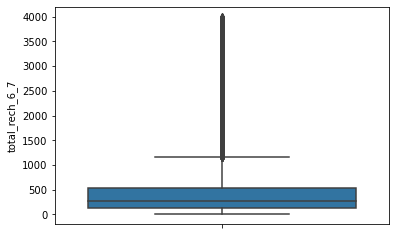

In [449]:
sns.boxplot(y='total_rech_6_7', data=telecom[telecom['total_rech_6_7'] < 4000])

In [450]:
# Customer recharged with an amount more than or equal to 70th percentile

telecom.loc[telecom['total_rech_6_7'] >= telecom['total_rech_6_7'].quantile(0.7)].shape

(30001, 229)

30001 Customers recharged with an amount **more than or equal to 70th percentile**

In [451]:
# Customer recharged with an amount more than 70th percentile

telecom.loc[telecom['total_rech_6_7'] > telecom['total_rech_6_7'].quantile(0.7)].shape

(29953, 229)

29953 Customers recharged with an amount **more than 70th percentile**

In [452]:
# As per spec, Let's go with customers recharged with an amount more than or equal to 70th percentile
tele_hvalue = telecom.loc[telecom['total_rech_6_7'] >= telecom['total_rech_6_7'].quantile(0.7)]

# check the rows & columns of high value customers
tele_hvalue.shape

(30001, 229)

In [453]:
# check the first 5 rows in high value customers

tele_hvalue.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,NaN,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,NaN,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0


In [454]:
# check the missing value percentage
missingPercentage(tele_hvalue)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
last_date_of_month_9         1.22
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
onnet_mou_9                  6.34
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
offnet_mou_9                 6.34
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_ic_mou_9                6.34
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
roam_og_mou_9                6.34
loc_og_t2t_mou

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [455]:
#Filter 9th month columns

tele_hvalue.iloc[:, tele_hvalue.columns.str.contains('9')].head(10)

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,...,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
7,9/30/2014,500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
8,9/30/2014,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
21,9/30/2014,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
23,9/30/2014,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,...,13.93,314.74,212.17,212.17,0.0,0,0,1,0,1.0
33,9/30/2014,799.356,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,30.92,5588.11,764.28,771.39,0.0,0,0,2,0,1.0
38,9/30/2014,391.709,494.79,213.24,0.0,0.0,16.39,49.96,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0,3,0,0,0.0
41,9/30/2014,143.596,40.06,49.06,0.0,0.0,40.06,45.43,0.00,0.00,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
48,9/30/2014,1189.744,1589.23,728.41,0.0,0.0,454.03,640.44,18.13,0.21,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
53,9/30/2014,1076.247,99.83,403.23,0.0,0.0,91.73,99.18,0.00,0.00,...,0.82,0.00,0.00,8.40,0.0,0,2,0,0,0.0


In [456]:
#Checking the missing values in 9th month columns to tag Churn

#missing values in total incoming call - minutes of usage - month 9
print(tele_hvalue['total_ic_mou_9'].isnull().sum())

#missing values in total Outgoing call - minutes of usage - month 9
print(tele_hvalue['total_og_mou_9'].isnull().sum())

#missing values in total 2GB data used - month 9
print(tele_hvalue['vol_2g_mb_9'].isnull().sum())

#missing values in total 3GB data used - month 9
print(tele_hvalue['vol_3g_mb_9'].isnull().sum())

0
0
0
0


In [457]:
#suppress warnings

import warnings
warnings.filterwarnings("ignore")

In [458]:
# creating a churn column from 9th month data
# Add the usage of variables in 9th month - 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'
# For the users with the value '0', we tag as 1 (churn) or otherwise '0'(non-churn)

tele_hvalue.loc[:, 'churn'] = (tele_hvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis=1)==0).astype(int)

tele_hvalue.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0,0


In [459]:
# Extract the 9th month columns
col_mon9 = list(tele_hvalue.columns[tele_hvalue.columns.str.contains('9')])

col_mon9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [460]:
#checking the length of 9th month columns

len(col_mon9)

54

In [461]:
#checking the shape of dataframe
tele_hvalue.shape

(30001, 230)

In [462]:
#Remove all the data related to 9th month from the dataframe

tele_hvalue.drop(columns=col_mon9, inplace=True)

In [463]:
#checking the missing values percentage
missingPercentage(tele_hvalue)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

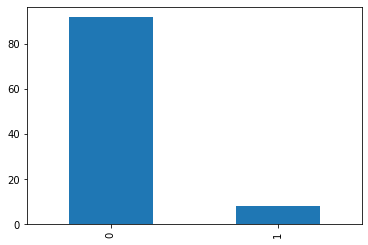

In [464]:
# Checking the percentage of churn & not churn data

(tele_hvalue['churn'].value_counts(1)*100).plot.bar()
plt.show()

In [465]:
# Checking the percentage of churn & not churn data

tele_hvalue['churn'].value_counts(1)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [466]:
#checking the missing values percentage

missingPercentage(tele_hvalue)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [467]:
# checking the value counts 'loc_og_t2o_mou'

tele_hvalue['loc_og_t2o_mou'].value_counts()

0.0    29777
Name: loc_og_t2o_mou, dtype: int64

In [468]:
# checking the value counts 'std_og_t2o_mou'

tele_hvalue['std_og_t2o_mou'].value_counts()

0.0    29777
Name: std_og_t2o_mou, dtype: int64

In [469]:
# checking the value counts 'loc_ic_t2o_mou'

tele_hvalue['loc_ic_t2o_mou'].value_counts()

0.0    29777
Name: loc_ic_t2o_mou, dtype: int64

All the values in column **'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'loc_og_t2o_mou' have same value - 0**<br/>
So, we can drop these 4 columns

In [470]:
# All the values in column 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou' have same value - 0
# So, we can drop all three columns

tele_hvalue.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], inplace=True)

In [471]:
#checking the shape of the dataframe

tele_hvalue.shape

(30001, 173)

In [472]:
#checking the value counts of 'last_date_of_month_6'

tele_hvalue['last_date_of_month_6'].value_counts()

6/30/2014    30001
Name: last_date_of_month_6, dtype: int64

In [473]:
#checking the value counts of 'last_date_of_month_6'

tele_hvalue['last_date_of_month_7'].value_counts()

7/31/2014    29974
Name: last_date_of_month_7, dtype: int64

In [474]:
#imputing missing value in 'last_date_of_month_7' with mode

tele_hvalue['last_date_of_month_7'] = tele_hvalue['last_date_of_month_7'].fillna(tele_hvalue['last_date_of_month_7'].mode()[0])

In [475]:
#checking the value counts of 'last_date_of_month_8'

tele_hvalue['last_date_of_month_8'].value_counts()

8/31/2014    29836
Name: last_date_of_month_8, dtype: int64

In [476]:
#imputing missing value in 'last_date_of_month_8' with mode

tele_hvalue['last_date_of_month_8'] = tele_hvalue['last_date_of_month_8'].fillna(tele_hvalue['last_date_of_month_8'].mode()[0])

In [477]:
#checking the value counts of 'last_date_of_month_8'

tele_hvalue['last_date_of_month_8'].value_counts()

8/31/2014    30001
Name: last_date_of_month_8, dtype: int64

In [478]:
#checking the shape of tele_hvalue

tele_hvalue.shape

(30001, 173)

In [479]:
# onnet - All kind of calls within the same operator network
# offnet - All kind of calls outside the operator T network

# fill all the below columns with missing value as 0

tele_hvalue[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']] = tele_hvalue[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']].fillna(0)

In [480]:
# roam - Indicates that customer is in roaming zone during the call

# fill all the below columns with missing value as 0
# 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'

tele_hvalue[['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']] = tele_hvalue[['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']].fillna(0)



In [481]:
#Extracting all int columns
int_cols = list(tele_hvalue.select_dtypes(include=['int64']).columns)

int_cols

['mobile_number',
 'circle_id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'churn']

In [482]:
# checking the missing values in 'int' columns

tele_hvalue[int_cols].isnull().sum()

mobile_number         0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon                   0
churn                 0
dtype: int64

In [483]:
# there are no missing values in 'int' columns

In [484]:
#extracting float columns 
float_cols = list(tele_hvalue.select_dtypes(include=['float64']).columns)

float_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

In [485]:
#checking the missing values in float columns

round(100 * tele_hvalue[float_cols].isnull().sum() / tele_hvalue.shape[0], 2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
loc_og_t2t_mou_6       1.82
loc_og_t2t_mou_7       1.79
loc_og_t2t_mou_8       3.91
loc_og_t2m_mou_6       1.82
loc_og_t2m_mou_7       1.79
loc_og_t2m_mou_8       3.91
loc_og_t2f_mou_6       1.82
loc_og_t2f_mou_7       1.79
loc_og_t2f_mou_8       3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
std_og_t2t_mou_6       1.82
std_og_t2t_mou_7       1.79
std_og_t2t_mou_8       3.91
std_og_t2m_mou_6       1.82
std_og_t2m_mou_7       1.79
std_og_t2m_mou_8    

In [486]:
#fill missing values in column from column 'loc_og_t2t_mou_6' to column 'ic_others_8' with 0

tele_hvalue.loc[:, 'loc_og_t2t_mou_6':'ic_others_8'] = tele_hvalue.loc[:, 'loc_og_t2t_mou_6':'ic_others_8'].fillna(0)

In [487]:
missingPercentage(tele_hvalue)

mobile_number                0.00
circle_id                    0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2m_mou_6             0.00
loc_og_t2m_mou_7             0.00
loc_og_t2m_mou_8             0.00
loc_og_t2f_mou_6             0.00
loc_og_t2f_mou_7             0.00
loc_og_t2f_mou_8             0.00
loc_og_t2c_mou

In [488]:
# checking the info 'date_of_last_rech'

tele_hvalue[['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   max_rech_amt_6  30001 non-null  int64
 1   max_rech_amt_7  30001 non-null  int64
 2   max_rech_amt_8  30001 non-null  int64
dtypes: int64(3)
memory usage: 937.5 KB


In [489]:
#checking the value counts of 'date_of_last_rech_6'

tele_hvalue['date_of_last_rech_6'].value_counts()

6/30/2014    8376
6/29/2014    5333
6/28/2014    3666
6/27/2014    3160
6/26/2014    1827
6/25/2014    1324
6/24/2014    1042
6/23/2014     703
6/21/2014     639
6/14/2014     549
6/22/2014     526
6/17/2014     456
6/20/2014     398
6/18/2014     388
6/19/2014     387
6/12/2014     213
6/13/2014     210
6/16/2014     203
6/15/2014     141
6/11/2014      81
6/8/2014       61
6/7/2014       47
6/10/2014      47
6/5/2014       33
6/9/2014       27
6/3/2014       25
6/6/2014       24
6/4/2014       19
6/2/2014       13
6/1/2014       10
Name: date_of_last_rech_6, dtype: int64

In [490]:
# null value in 'date_of_last_rech_6' means the user hasn't recharge that months
# as per per values from column 'total_rech_amt_6'
# the same applies for 'date_of_last_rech_7' & 'date_of_last_rech_8'

tele_hvalue[tele_hvalue['date_of_last_rech_6'].isnull()].head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_6_7,churn
91,7000160837,109,6/30/2014,7/31/2014,8/31/2014,4.0,149.121,123.761,0.0,0.00,...,1.0,707,0.00,0.00,0.0,0.0,0.0,1002.0,501.0,0
414,7000919353,109,6/30/2014,7/31/2014,8/31/2014,20.0,290.490,132.698,0.0,23.56,...,1.0,429,0.00,0.00,0.0,0.0,0.0,1083.0,541.5,0
6319,7001490351,109,6/30/2014,7/31/2014,8/31/2014,0.0,729.552,313.890,0.0,231.56,...,NaN,2435,2.69,67.03,0.0,0.0,0.0,1404.0,702.0,0
8125,7000832622,109,6/30/2014,7/31/2014,8/31/2014,0.0,332.850,698.625,0.0,9.08,...,1.0,440,0.00,0.00,0.0,0.0,0.0,2566.0,1283.0,0
8975,7000822092,109,6/30/2014,7/31/2014,8/31/2014,0.0,427.604,213.787,0.0,0.00,...,1.0,680,0.00,0.00,0.0,0.0,0.0,1512.0,756.0,0


Null value in 'date_of_last_rech_6' means the user hasn't recharge that months<br/>
As per per values from column 'total_rech_amt_6'<br/>
the same applies for 'date_of_last_rech_7' & 'date_of_last_rech_8'

Fill the missing values in last recharge date for 6th month with mode<br/>
Fill the missing values in last recharge date for 7th month with last recharge date of 6th month<br/>

Fill the last recharge date for 8th month with mode(so that we can derive variables)

In [491]:
#fill the missing values in last recharge date of the 6th month with mode

tele_hvalue['date_of_last_rech_6'] = tele_hvalue['date_of_last_rech_6'].fillna(tele_hvalue['date_of_last_rech_6'].mode()[0])


In [492]:
#fill the missing values in last recharge date for 7th month with last recharge date of 6th month

tele_hvalue['date_of_last_rech_7'] = tele_hvalue.apply(lambda x: x['date_of_last_rech_6'] if pd.isnull(x['date_of_last_rech_7']) else x['date_of_last_rech_7'], axis=1)



In [493]:
#fill the missing values in last recharge date for 8th month with mode

tele_hvalue['date_of_last_rech_8'] = tele_hvalue['date_of_last_rech_8'].fillna(tele_hvalue['date_of_last_rech_8'].mode()[0])


In [494]:
# date_of_last_rech_data for 6, 7, 8 has more than 40% missing values
# So, we can remove those columns


tele_hvalue.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], inplace=True)



In [495]:
#value counts of total recharged data

tele_hvalue['total_rech_data_6'].value_counts(dropna=False)

NaN     13245
1.0      7051
2.0      3856
3.0      1628
4.0      1085
5.0       725
6.0       563
7.0       421
8.0       340
9.0       260
10.0      219
11.0      159
12.0      135
14.0       63
13.0       59
15.0       32
17.0       29
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
25.0        4
23.0        4
40.0        3
26.0        3
32.0        3
35.0        2
29.0        2
28.0        2
55.0        1
61.0        1
34.0        1
33.0        1
46.0        1
27.0        1
Name: total_rech_data_6, dtype: int64

There are some people who don't recharge data pack at all<br/>
For them, we can we apply the value 0 in missing values 

I feel it's better to impute with  0 for these remaining missing value.<br/>
Because, it's clear that the user hasn't recharged any data pack

In [496]:
#imputing data columns with missing values from 'total_rech_data_6' to 'av_rech_amt_data_8' as 0

tele_hvalue.loc[:, 'total_rech_data_6':'av_rech_amt_data_8'] = tele_hvalue.loc[:, 'total_rech_data_6':'av_rech_amt_data_8'].fillna(0)

In [497]:
#For people who don't use data pack, arpu for 3g & 2g column with missing value is 0

tele_hvalue.loc[:, 'arpu_3g_6':'arpu_2g_8'] = tele_hvalue.loc[:, 'arpu_3g_6':'arpu_2g_8'].fillna(0)

In [498]:
#checking the value counts of night_pck_user

tele_hvalue['night_pck_user_6'].value_counts(dropna=False)

0.0    16349
NaN    13245
1.0      407
Name: night_pck_user_6, dtype: int64

In [499]:
#for the missing value, we can use -1 to give a different third category or 0 

tele_hvalue.loc[:, 'night_pck_user_6':'night_pck_user_8'] = tele_hvalue.loc[:, 'night_pck_user_6':'night_pck_user_8'].fillna(-1)

In [500]:
#checking the value counts of 'fb_user_6'

tele_hvalue['fb_user_6'].value_counts(dropna=False)

1.0    15525
NaN    13245
0.0     1231
Name: fb_user_6, dtype: int64

In [501]:
#imputing fb_user missing values with -1

tele_hvalue.loc[:, 'fb_user_6':'fb_user_8'] = tele_hvalue.loc[:, 'fb_user_6':'fb_user_8'].fillna(-1)

In [502]:
tele_hvalue.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_6_7,churn
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,...,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,-1.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,...,1.0,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0,0
21,7002124215,109,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,...,-1.0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0
23,7000887461,109,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,...,1.0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0,0


**we have imputed all of the columns with missing values**

In [503]:
#checking the number of columns for 6th month

len(list(tele_hvalue.columns[tele_hvalue.columns.str.contains('6')]))

55

In [504]:
#checking the number of columns for 7th month

len(list(tele_hvalue.columns[tele_hvalue.columns.str.contains('7')]))

55

In [505]:
#checking the number of columns for 8th month

len(list(tele_hvalue.columns[tele_hvalue.columns.str.contains('8')]))

53

## Derived Variables from 8th month

For each column in 6th & 7th month, we take average of them & subtract the respective column in 8th month to get derived variables<br/>

It's important to derive these variables to check the usage drop in 8th month as compared to 6th & 7th month

In [506]:
#fuction to get the derived variables

for i in list(tele_hvalue.filter(regex='_8')):
    feature=i.strip('_8')
    if (tele_hvalue[feature+'_6'].dtype!='object'):
        #print(feature)
        tele_hvalue[feature+'_derived_aug']=((tele_hvalue[feature+'_6']+tele_hvalue[feature+'_7'])/2)-tele_hvalue[feature+'_8']
    else:
        print(feature)

last_date_of_month
date_of_last_rech


In [507]:
#checking the first five rows

tele_hvalue.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,vol_2g_mb_derived_aug,vol_3g_mb_derived_aug,arpu_3g_derived_aug,arpu_2g_derived_aug,night_pck_user_derived_aug,monthly_2g_derived_aug,sachet_2g_derived_aug,monthly_3g_derived_aug,sachet_3g_derived_aug,fb_user_derived_aug
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,...,9.975,7.555,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,...,177.970,363.535,-19.830,0.00,-0.5,0.5,-2.5,0.0,0.0,-1.0
21,7002124215,109,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,...,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
23,7000887461,109,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,...,0.230,-710.375,-43.985,0.22,-0.5,0.0,0.0,0.0,-1.0,-1.0


In [508]:
#checking the columns with 'object datatype'

tele_hvalue.select_dtypes(include ='object').head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014


In [509]:
#convert the date column to datetime format

tele_hvalue['date_of_last_rech_6'] = pd.to_datetime(tele_hvalue['date_of_last_rech_6'], format='%m/%d/%Y')
tele_hvalue['date_of_last_rech_7'] = pd.to_datetime(tele_hvalue['date_of_last_rech_7'], format='%m/%d/%Y')
tele_hvalue['date_of_last_rech_8'] = pd.to_datetime(tele_hvalue['date_of_last_rech_8'], format='%m/%d/%Y')

tele_hvalue['last_date_of_month_6'] = pd.to_datetime(tele_hvalue['last_date_of_month_6'], format='%m/%d/%Y')
tele_hvalue['last_date_of_month_7'] = pd.to_datetime(tele_hvalue['last_date_of_month_7'], format='%m/%d/%Y')
tele_hvalue['last_date_of_month_8'] = pd.to_datetime(tele_hvalue['last_date_of_month_8'], format='%m/%d/%Y')

In [510]:
#checking info

tele_hvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 221 entries, mobile_number to fb_user_derived_aug
dtypes: datetime64[ns](6), float64(187), int64(28)
memory usage: 50.8 MB


In [511]:
#Extracting the datetime columns

tele_hvalue.select_dtypes(include ='datetime64').head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31
23,2014-06-30,2014-07-31,2014-08-31,2014-06-18,2014-07-07,2014-08-24


In [512]:
#Find the number of days it took for the user to recharge in 8th month

tele_hvalue['days_last_rech'] = tele_hvalue['date_of_last_rech_8'] - tele_hvalue['date_of_last_rech_7']

In [513]:
#Find the number of month it took for the user to recharge in 8th month

tele_hvalue['months_last_rech'] = tele_hvalue['date_of_last_rech_8'].dt.month - tele_hvalue['date_of_last_rech_7'].dt.month

In [514]:
# Convert days to int - number of days it took for the user to recharge in 8th month

tele_hvalue['days_last_rech'] = tele_hvalue['days_last_rech'].dt.days

In [515]:
#checking the value counts of 'months_last_rech'

tele_hvalue['months_last_rech'].value_counts()

1    29903
2       98
Name: months_last_rech, dtype: int64

In [516]:
#derive the vbc - value based cost value from the 8th month

vbc_3g_derived_aug = ((tele_hvalue['jun_vbc_3g'] + tele_hvalue['jul_vbc_3g'])/2) - tele_hvalue['aug_vbc_3g']

In [517]:
tele_hvalue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 223 entries, mobile_number to months_last_rech
dtypes: datetime64[ns](6), float64(187), int64(30)
memory usage: 51.3 MB


# Data Visualisation

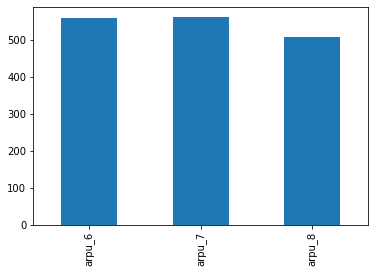

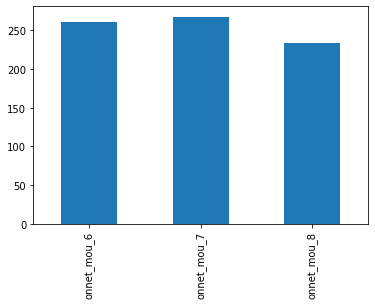

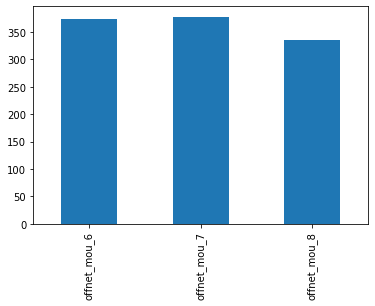

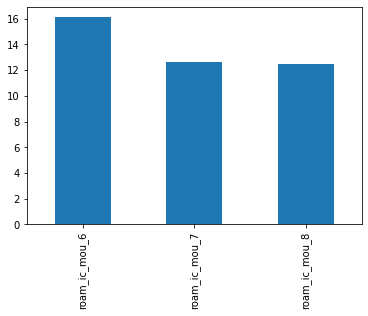

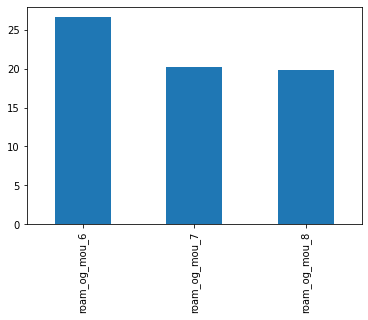

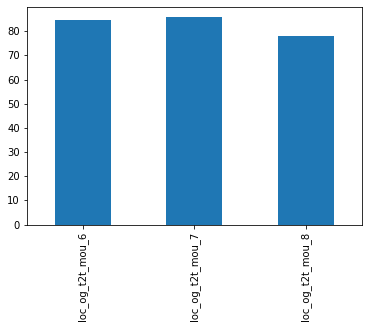

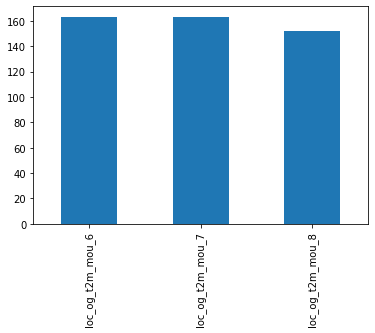

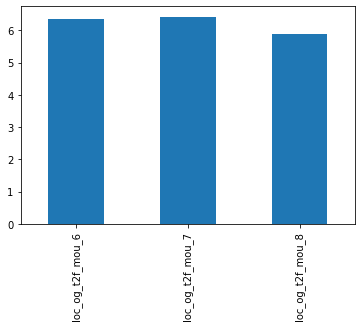

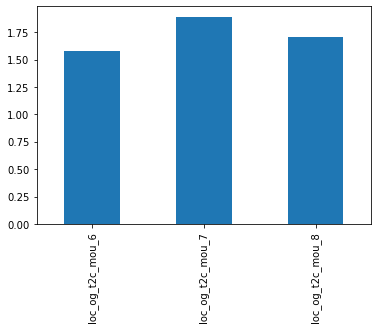

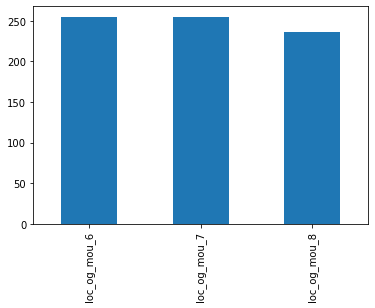

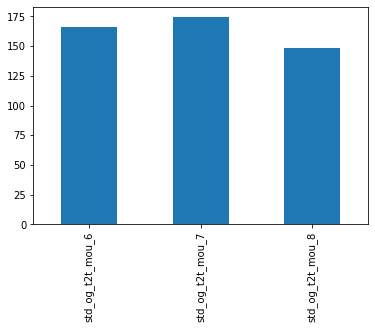

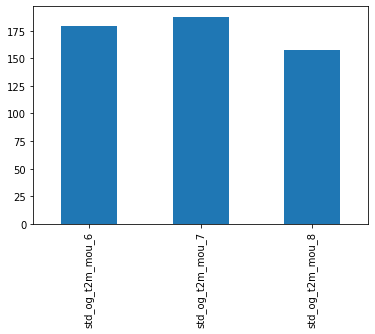

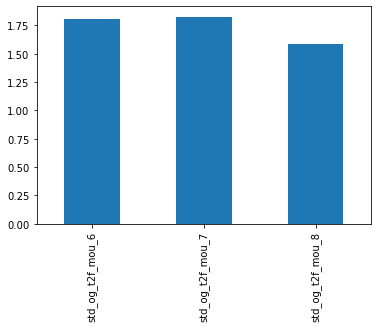

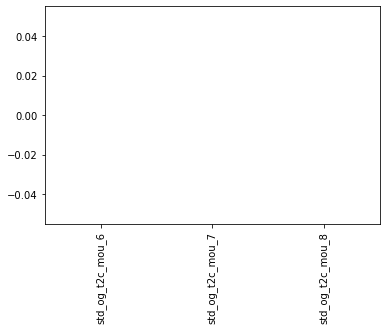

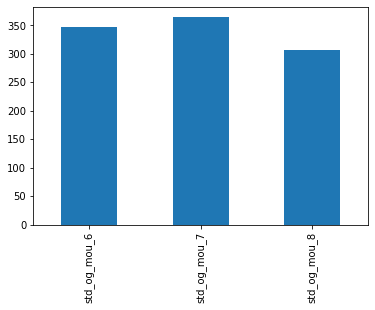

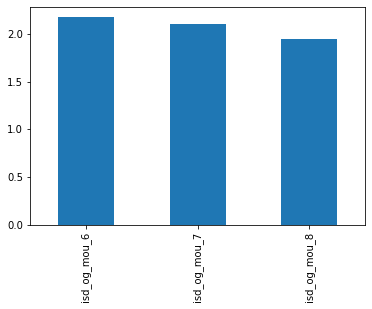

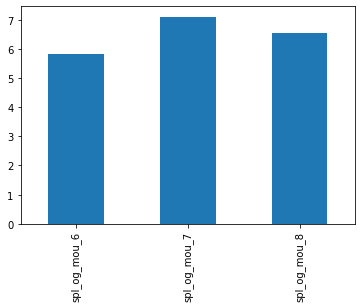

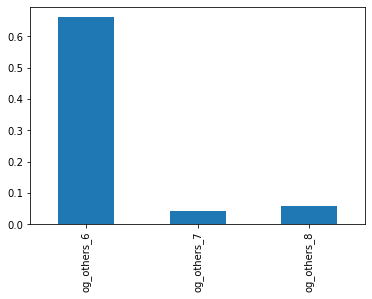

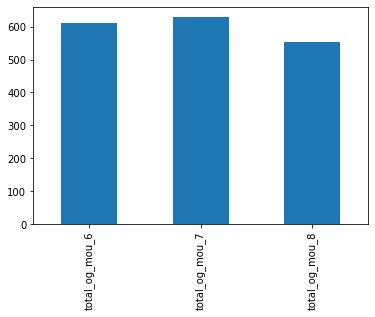

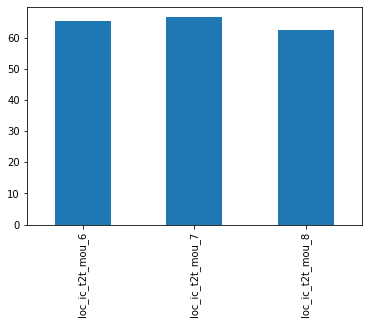

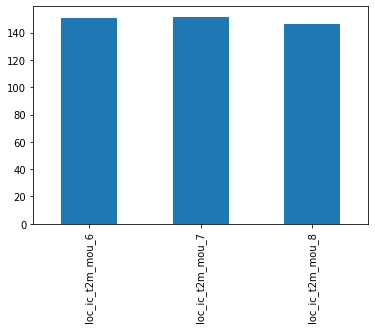

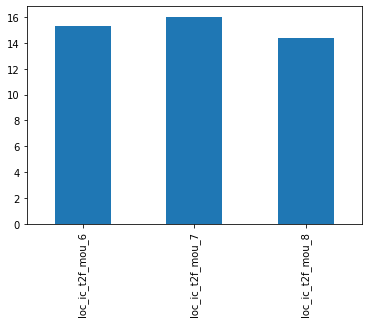

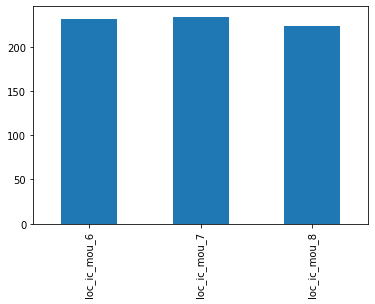

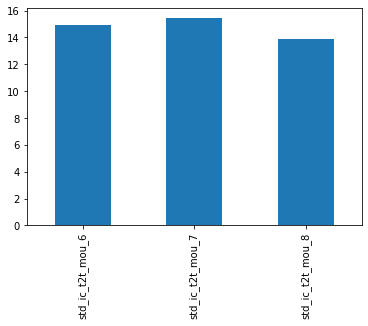

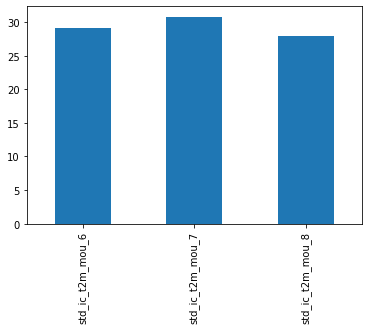

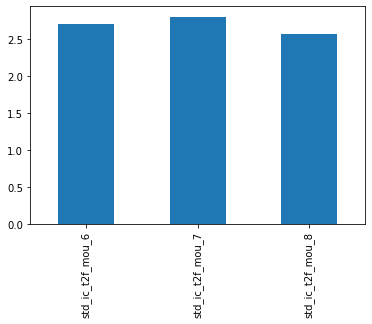

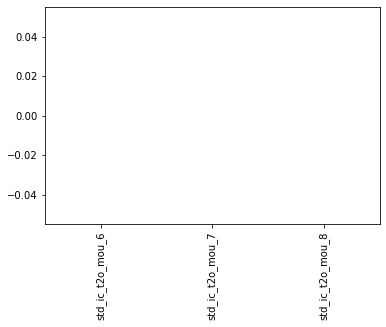

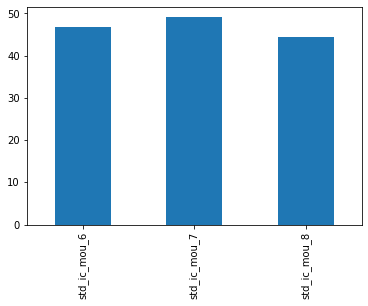

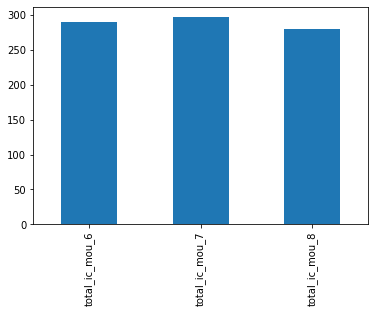

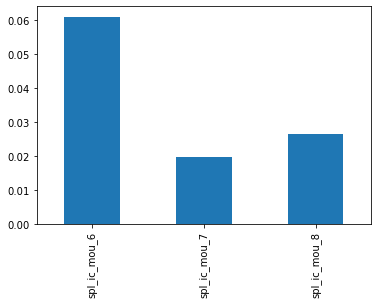

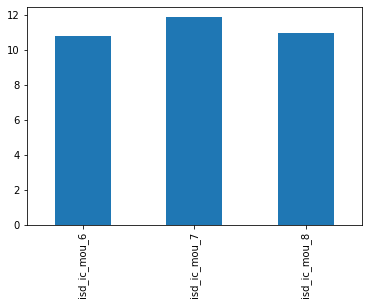

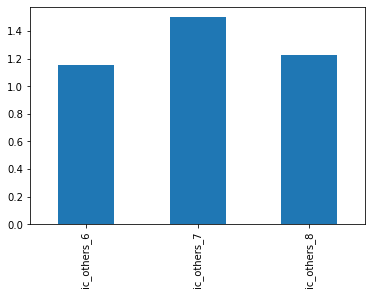

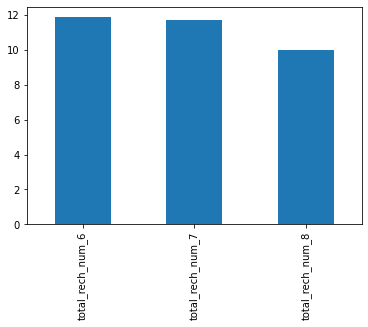

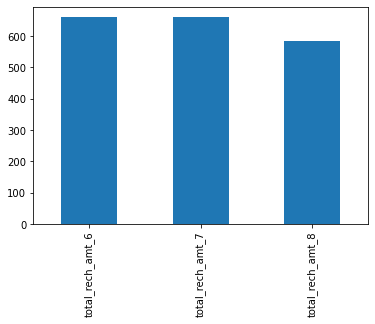

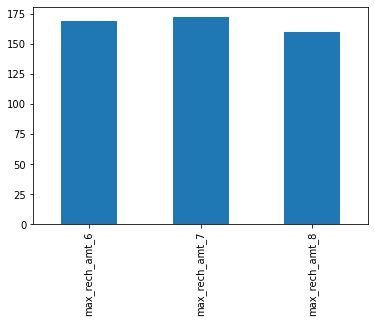

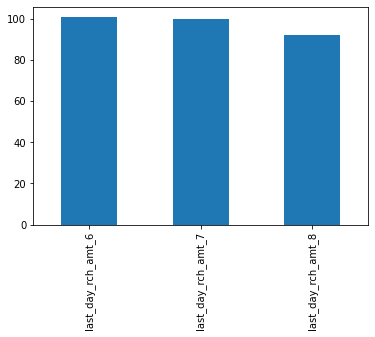

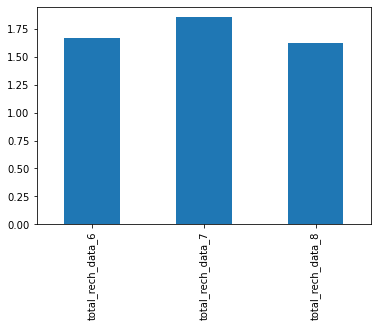

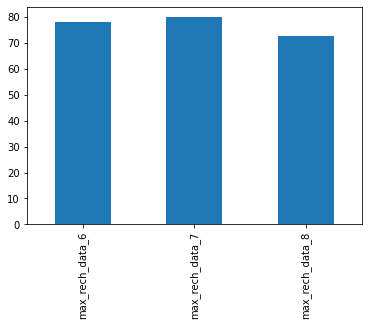

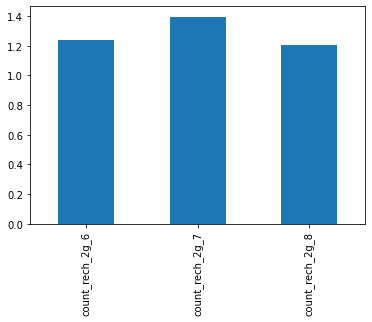

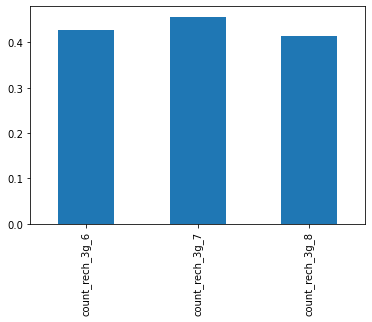

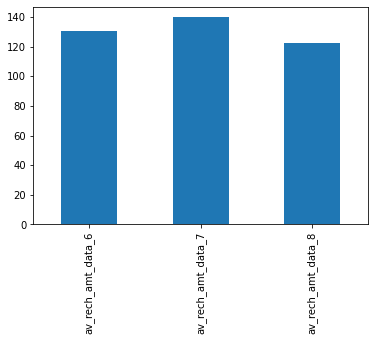

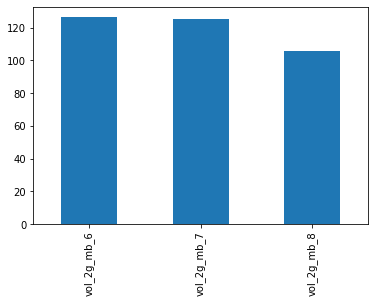

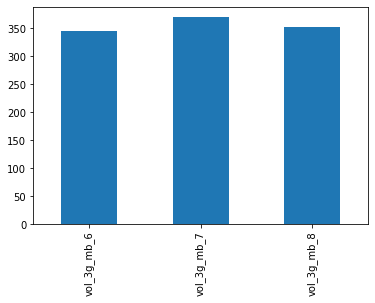

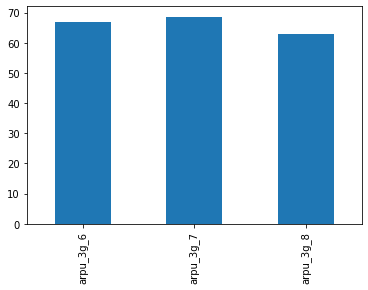

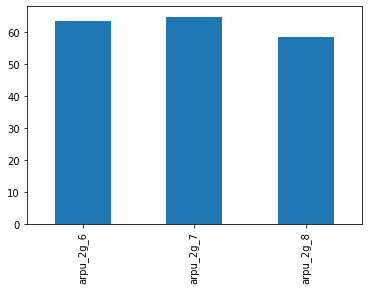

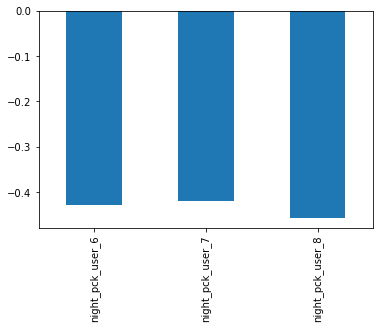

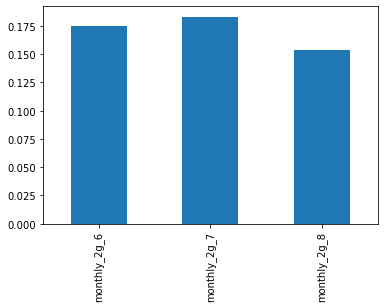

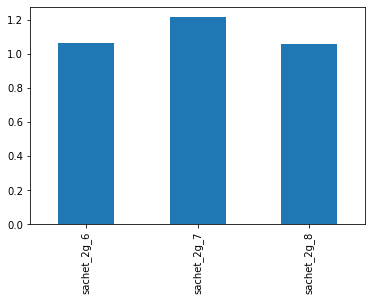

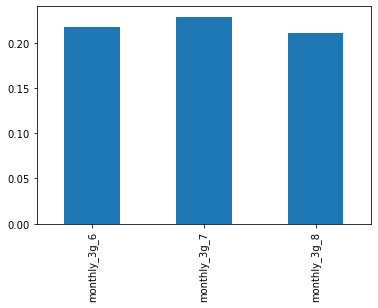

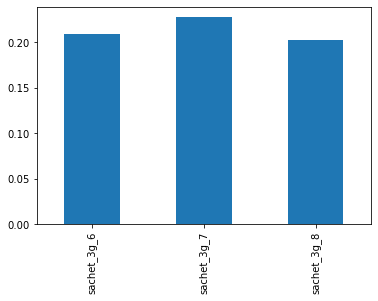

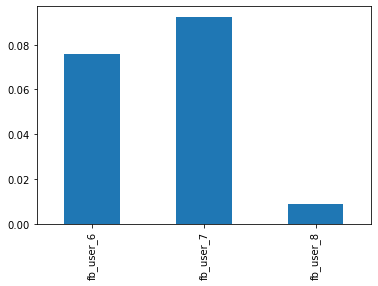

In [518]:
#Plots - Customer usage trend - between 6, 7, 8th month 

for i in list(tele_hvalue.filter(regex='_8')):
    feature=i.strip('_8')
    if (tele_hvalue[feature+'_6'].dtype!='<M8[ns]'):
        feature_table=tele_hvalue[[feature+'_6',feature+'_7',feature+'_8']]
        feature_table.mean().plot.bar()
        plt.show()

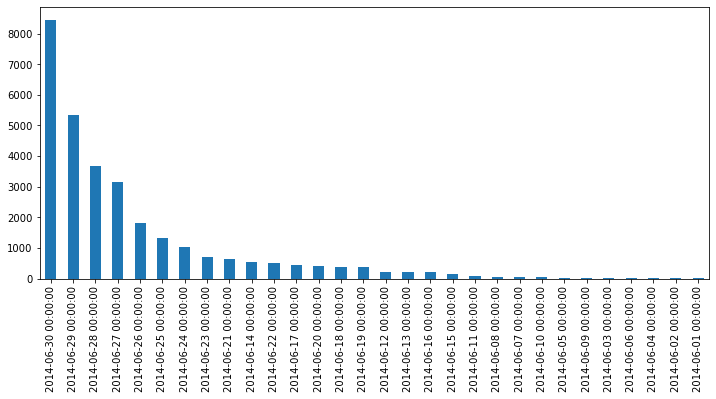

In [519]:
# Testing date of last recharge significance
len(tele_hvalue.date_of_last_rech_6.unique())
# Basically all 31 days of the month have benn listed

# Lets see when most of the recharges takes place

fig = plt.figure(figsize=[12,5])
tele_hvalue.date_of_last_rech_6.value_counts().plot.bar()
# Mostly they recharge(pay bill) in the end of hte month and reduces with month begining

plt.show()

# Data Cleaning

In [520]:
# Extracting 8th month columns

col_8_mnth = list(tele_hvalue.columns[tele_hvalue.columns.str.contains('8')])

col_8_mnth

['last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8']

In [521]:
#drop 8th month columns

tele_hvalue.drop(columns=col_8_mnth, inplace=True)

In [522]:
#drop the derived value to extract high value customers

tele_hvalue.drop(columns=['aug_vbc_3g', 'sep_vbc_3g', 'total_rech_6', 'total_rech_7', 'total_rech_6_7'], inplace=True)

In [523]:
# Drop id's such as mobile number & circle 

tele_hvalue.drop(columns=['mobile_number', 'circle_id'], inplace=True)

In [524]:
#Extracting datetime columns
dateCols = list(tele_hvalue.select_dtypes(include=['datetime64']).columns)

dateCols

['last_date_of_month_6',
 'last_date_of_month_7',
 'date_of_last_rech_6',
 'date_of_last_rech_7']

In [525]:
#dropping datetime columns

tele_hvalue.drop(columns=dateCols, inplace=True)

In [526]:
#checking the columns with unique values

uniq_val_cols = []

for i in list(tele_hvalue.columns):
     if len(tele_hvalue[i].unique()) < 2:
        uniq_val_cols.append(i)
        
print(uniq_val_cols)

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_derived_aug', 'std_ic_t2o_mou_derived_aug']


In [527]:
#drop columns with unique values

tele_hvalue.drop(columns=uniq_val_cols, inplace=True)

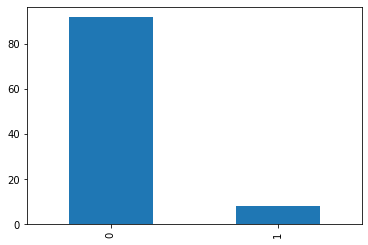

In [528]:
# Checking the percentage of churn & not churn data

(tele_hvalue['churn'].value_counts(1)*100).plot.bar()
plt.show()

In [529]:
# churn percentage

round(100 * tele_hvalue['churn'].sum() / tele_hvalue.shape[0], 2)

8.14

churn % class is only 8%. So we have solve class imbalance before doing modelling

# Data Cleaning - Outlier

We tried removing outliers for all the features at once by setting lower quantile of 5% and higher quantile of 100%, <br/>
number of observation decreased from 30,000 to 900<br/>

So, we dropped the idea of Outlier correction

In [530]:
# As the number of variables is large, all the features are capped between:[5,85th] percentile
print('Size of the data before outlier removing:',tele_hvalue.shape)

# Removing all the date features, already derived stuff out of these features
df_dummy=tele_hvalue.select_dtypes(exclude='<M8[ns]')

# We dont want to do outlier treatment on the target variable
columns_without_target = list(df_dummy.columns)
columns_without_target.remove('churn')
# Main cleaning
low=0.05
high=1
for i in columns_without_target:
    print(i)
    lower=df_dummy[i].quantile(low)
    higher=df_dummy[i].quantile(high)
    df_dummy = df_dummy.loc[(lower<=df_dummy[i])&(df_dummy[i]<=higher),:]
    print('Size of the data after outlier removing:',df_dummy.shape)
    
# As the number of variables is large, all the features are capped between:[5,85th] percentile
# print('Size of the data before outlier removing:',df.shape)

# # Removing all the date features, already derived stuff out of these features
# df=df.select_dtypes(exclude='<M8[ns]')

# # We dont want to do outlier treatment on the target variable
# df_outlier=df.loc[:,df.columns!='target']

# A dataframe containg the quantiles of each of the features
#(https://stackoverflow.com/questions/35827863/remove-outlie

Size of the data before outlier removing: (30001, 153)
arpu_6
Size of the data after outlier removing: (28501, 153)
arpu_7
Size of the data after outlier removing: (27077, 153)
onnet_mou_6
Size of the data after outlier removing: (27077, 153)
onnet_mou_7
Size of the data after outlier removing: (27077, 153)
offnet_mou_6
Size of the data after outlier removing: (25726, 153)
offnet_mou_7
Size of the data after outlier removing: (24439, 153)
roam_ic_mou_6
Size of the data after outlier removing: (24439, 153)
roam_ic_mou_7
Size of the data after outlier removing: (24439, 153)
roam_og_mou_6
Size of the data after outlier removing: (24439, 153)
roam_og_mou_7
Size of the data after outlier removing: (24439, 153)
loc_og_t2t_mou_6
Size of the data after outlier removing: (23218, 153)
loc_og_t2t_mou_7
Size of the data after outlier removing: (22058, 153)
loc_og_t2m_mou_6
Size of the data after outlier removing: (20956, 153)
loc_og_t2m_mou_7
Size of the data after outlier removing: (19908, 153)
l

Size of the data after outlier removing: (2984, 153)
loc_ic_t2f_mou_derived_aug
Size of the data after outlier removing: (2834, 153)
loc_ic_mou_derived_aug
Size of the data after outlier removing: (2692, 153)
std_ic_t2t_mou_derived_aug
Size of the data after outlier removing: (2557, 153)
std_ic_t2m_mou_derived_aug
Size of the data after outlier removing: (2429, 153)
std_ic_t2f_mou_derived_aug
Size of the data after outlier removing: (2307, 153)
std_ic_mou_derived_aug
Size of the data after outlier removing: (2191, 153)
total_ic_mou_derived_aug
Size of the data after outlier removing: (2081, 153)
spl_ic_mou_derived_aug
Size of the data after outlier removing: (2002, 153)
isd_ic_mou_derived_aug
Size of the data after outlier removing: (1901, 153)
ic_others_derived_aug
Size of the data after outlier removing: (1806, 153)
total_rech_num_derived_aug
Size of the data after outlier removing: (1718, 153)
total_rech_amt_derived_aug
Size of the data after outlier removing: (1633, 153)
max_rech_a

# Heatmap

<AxesSubplot:>

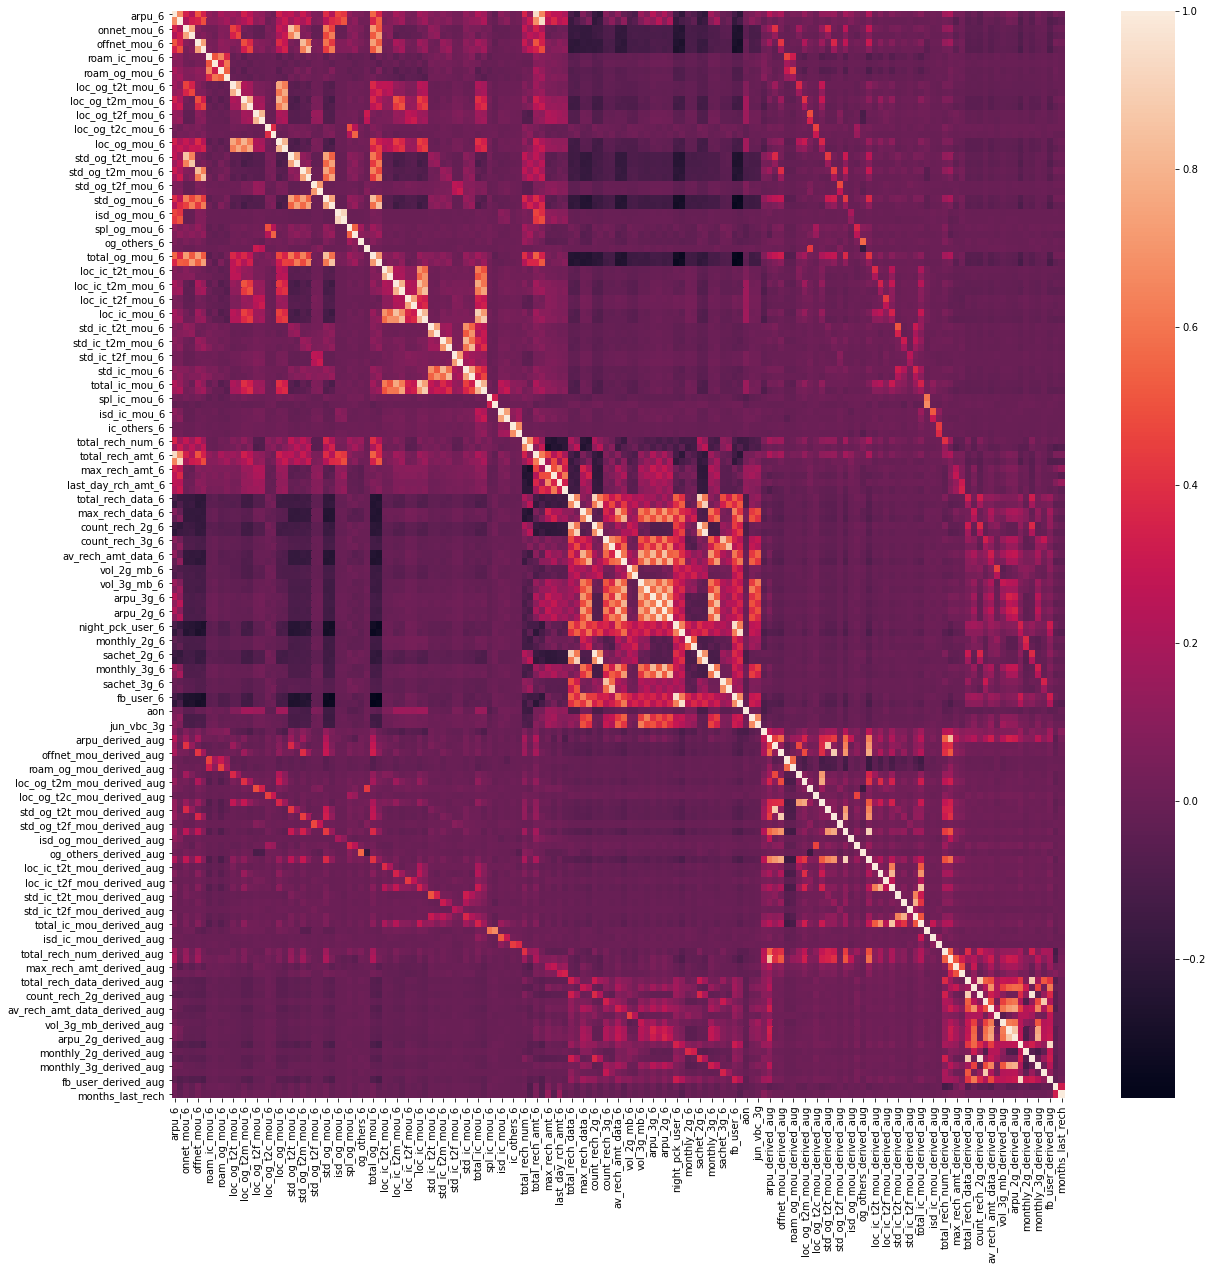

In [531]:
# Correlation to see collinearity

fig = plt.figure(figsize=[20, 20])
sns.heatmap(tele_hvalue.corr())

# Train - Test split

In [532]:
#take a copy of the dataframe to work on

df = tele_hvalue.copy()

In [533]:
# Separate input features and target

y = df.churn
X = df.drop('churn', axis=1)

In [534]:
#import library for test train split
from sklearn.model_selection import train_test_split

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Standardisation

We have to standardise the data before modelling

In [535]:
#import StandardScaler library

from sklearn.preprocessing import StandardScaler

In [536]:
#Instantiate the StandardScaler

scaler = StandardScaler()

In [537]:
# Fit_transform the X_train

X_train = scaler.fit_transform(X_train)

In [538]:
# Transform the X_test

X_test = scaler.transform(X_test)

In [539]:
#checking the rows & columns

df.shape

(30001, 153)

# PCA

We have more than 150 column. So, **we have to use PCA to reduce dimensions**

In [540]:
#import PCA library

from sklearn.decomposition import PCA

In [541]:
#Instantiate PCA

pca = PCA(random_state=42)

In [542]:
#fit PCA

pca.fit(X_train)

PCA(random_state=42)

In [543]:
#checking PCA components

pca.components_

array([[-8.50427690e-02, -7.22124399e-02, -1.30184868e-01, ...,
         6.78904525e-02, -3.12119080e-03, -4.49259267e-03],
       [ 1.91746421e-01,  1.66279333e-01,  6.13889882e-02, ...,
         2.99574303e-02, -1.00077616e-02,  1.29969209e-04],
       [-4.14928428e-02,  5.81239528e-03, -1.02290804e-01, ...,
        -1.02860369e-01,  9.39963172e-03, -9.68495322e-03],
       ...,
       [-0.00000000e+00, -1.21151539e-16, -1.30413743e-14, ...,
        -4.52500574e-17, -6.14536147e-17, -1.19845696e-17],
       [-0.00000000e+00,  2.95570615e-16, -3.13055052e-15, ...,
        -9.68972377e-18, -5.37408062e-18, -2.85473976e-17],
       [-0.00000000e+00,  1.48739298e-16,  1.18010448e-15, ...,
         1.40154495e-17,  1.00768804e-17, -4.48354977e-17]])

In [544]:
#checking explained variance

pca.explained_variance_ratio_

array([9.23221148e-02, 6.76096983e-02, 5.22147316e-02, 4.67588158e-02,
       3.51162384e-02, 3.07822704e-02, 2.98947144e-02, 2.57239423e-02,
       2.37342056e-02, 2.12033248e-02, 1.94208367e-02, 1.88349063e-02,
       1.85623590e-02, 1.74464320e-02, 1.67349158e-02, 1.61411459e-02,
       1.60506475e-02, 1.53863538e-02, 1.44858133e-02, 1.37392975e-02,
       1.33195806e-02, 1.24649179e-02, 1.17696266e-02, 1.15117542e-02,
       1.11672300e-02, 1.08836680e-02, 1.04874054e-02, 1.04426330e-02,
       1.00341660e-02, 9.66401181e-03, 9.50962713e-03, 9.36566603e-03,
       9.02650233e-03, 8.69562576e-03, 8.54567843e-03, 8.14729109e-03,
       7.59261009e-03, 7.43389388e-03, 7.17545962e-03, 7.01788529e-03,
       6.80230383e-03, 6.59248295e-03, 6.48979740e-03, 6.44284036e-03,
       6.30892406e-03, 6.10213803e-03, 6.01217209e-03, 5.97723329e-03,
       5.69337370e-03, 5.60435012e-03, 5.52157816e-03, 5.49341066e-03,
       5.29789817e-03, 5.27860625e-03, 4.75087693e-03, 4.70556671e-03,
      

In [545]:
#cumulative explained_variance_ratio_

var_cumu = np.cumsum(pca.explained_variance_ratio_)

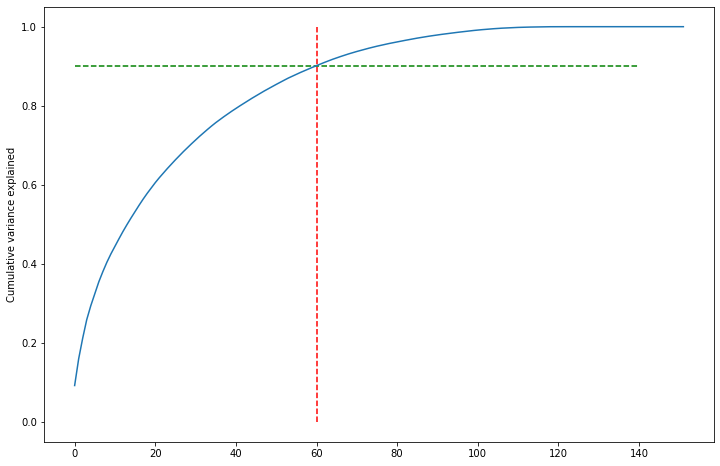

In [546]:
#cumulative plot for explained_variance_ratio_

fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**60 PCA components** explain around 90% of the variance

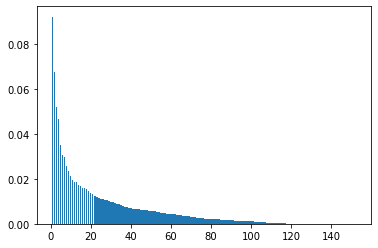

In [547]:
# Scree plot

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_) 
plt.show()

In [548]:
#importing IncrementalPCA for creating PCA training data

from sklearn.decomposition import IncrementalPCA

In [549]:
# Instantiate PCA to create 60 components for 90% variance 

pca_final = IncrementalPCA(n_components=60)

In [550]:
# Fit PCA on X_train

df_train_pca = pca_final.fit_transform(X_train)

In [551]:
#check the shape of PCA

df_train_pca.shape

(21000, 60)

In [552]:
#creating correlation matrix for the PCA

corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

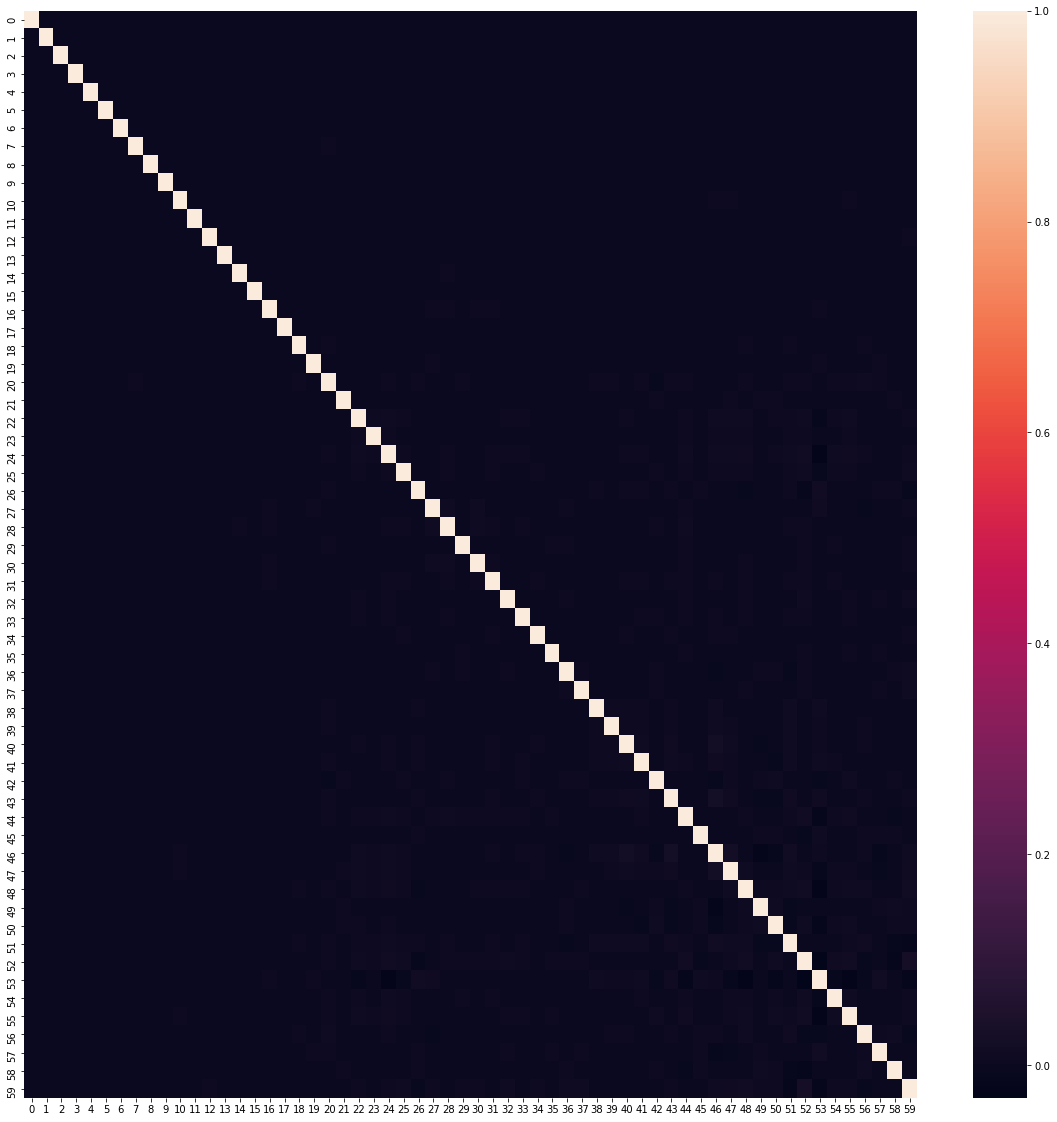

In [553]:
#plotting the Heatmap to check if there are collinearity in PCA components

plt.figure(figsize=[20,20])
sns.heatmap(corrmat)

**From the above graph, it's clear that there is no collinearity & PCA captured most of the variance in the data**

In [554]:
#Transforming the test data with PCA

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

# Solving Class Balance in the data

We have huge class balance in the data. So, we are solved it using Upsampling

In [555]:
#importing resample library 

from sklearn.utils import resample

In [556]:
#creating columns for PCA Dataframe

pca_col_names = ['pca_' + str(i) for i in range(1, 61)]

In [557]:
#coverting PCA to Dataframe 

X_train_pca = pd.DataFrame(df_train_pca, columns=pca_col_names)

In [558]:
df_train_pca.shape

(21000, 60)

In [559]:
#creating DF for y_train

y_train = pd.DataFrame(pd.Series(y_train).values.reshape(-1, 1), columns=['churn'])

In [560]:
#Concatinating X_train_pca & y_train for upsampling

X = pd.concat([X_train_pca, y_train], axis=1)

In [561]:
# separate minority and majority classes

not_churn = X[X.churn==0]
churn = X[X.churn==1]

In [562]:
# upsample minority

churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

In [563]:
# combine majority and upsampled minority

upsampled = pd.concat([not_churn, churn_upsampled])

In [564]:
upsampled['churn'].value_counts()

1    19273
0    19273
Name: churn, dtype: int64

In [565]:
#upsampled.head()

# Modelling - Random Forest

In [566]:
# Extracting y_train

y_train = upsampled.pop('churn')

In [567]:
# Extracting x_train

X_train = upsampled

In [568]:
#importing RandomForestClassifier Library

from sklearn.ensemble import RandomForestClassifier

In [569]:
# Instantiate RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

In [570]:
#For Hyperparameter tuning

param_grid = {
    'n_estimators' : [80, 100],
    'max_depth' : [10, 15, 20],
    'min_samples_leaf': [30, 40, 50]
}

In [571]:
#importing GridSearchCV Library for Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [572]:
# Instantiate GridSearchCV

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=4, n_jobs=-1, scoring='recall', verbose=2)

In [573]:
# Fit X_train, y_train

CV_rfc.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.0min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [80, 100]},
             scoring='recall', verbose=2)

In [574]:
#Best Estimator parameters

CV_rfc.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=30, random_state=42)

In [394]:
#Hardcoded best_estimator_

#clsf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=30)

In [395]:
#clsf.fit(X_train, y_train)

In [575]:
# Running model to predict on test data - y_pred

y_pred = CV_rfc.predict(df_test_pca)

In [576]:
#Import sklearn metrics

from sklearn import metrics

In [577]:
#Checking accuracy_score

round(metrics.accuracy_score(y_test, y_pred), 2)

0.9

**Accuracy score is 90%. Accuracy score is not the proper metric as per current business requirement**<br/>

**Recall score would be appropriate metric for this assignment because our model should predict more churn customers**

In [578]:
#check F1 Score

from sklearn.metrics import f1_score
round(f1_score(y_test, y_pred, average='weighted'), 2)

0.91

In [579]:
#Checking the Confusion metric

metrics.confusion_matrix(y_test, y_pred)

array([[7571,  716],
       [ 205,  509]])

In [580]:
# Checking Recall score for test data
# 7571 / (7571 + 205) = 97%

round(metrics.confusion_matrix(y_test, y_pred)[0][0]/(metrics.confusion_matrix(y_test, y_pred)[0][0]+metrics.confusion_matrix(y_test, y_pred)[1][0]), 2)

0.97

## Random Forest Model on Test Data

## F1 Score - 91%
## Recall Score - 97%
## Accuracy Score - 90%

In [402]:
# predicting y_pred_train
y_pred_train = CV_rfc.predict(X_train)

# Accuracy for train data
round(metrics.accuracy_score(y_train, y_pred_train), 2)

0.96

In [403]:
# Confusion matrix for train data

metrics.confusion_matrix(y_train, y_pred_train)

array([[17927,  1346],
       [  320, 18953]])

In [404]:
# Checking Recall score for train

round(metrics.confusion_matrix(y_train, y_pred_train)[0][0]/(metrics.confusion_matrix(y_train, y_pred_train)[0][0]+metrics.confusion_matrix(y_train, y_pred_train)[1][0]), 2)

0.98

# Model 2 - Logistic Regression (For Interpretability)

In [407]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression

In [408]:
# Separate input features and target
y = tele_hvalue.churn
X = tele_hvalue.drop('churn', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [409]:
# Fitting on LogisticRegression
# Setting class_weight='balanced' to solve imbalance class in data
highsampled = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train, y_train)

#Predicting model on X_test
y_pred_test = highsampled.predict(X_test)

#Checking Confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[6749, 1538],
       [ 112,  602]])

In [410]:
#checking accuracy score - Test

print('Accuracy Score - Test: ', metrics.accuracy_score(y_test, y_pred_test))

Accuracy Score - Test:  0.816687034773914


In [411]:
# Checking Recall score for test data

print('Recall Score - Test: ', round(metrics.confusion_matrix(y_test, y_pred)[0][0]/(metrics.confusion_matrix(y_test, y_pred)[0][0]+metrics.confusion_matrix(y_test, y_pred)[1][0]), 2))

Recall Score - Test:  0.97


In [412]:
#Checking confusion matrix on train_data

y_pred_train = highsampled.predict(X_train)
metrics.confusion_matrix(y_train, y_pred_train)

array([[15763,  3510],
       [  270,  1457]])

In [413]:
#checking accuracy score for train data

print('Accuracy Score - Train: ', metrics.accuracy_score(y_train, y_pred_train))

Accuracy Score - Train:  0.82


In [414]:
# Checking Recall score for train data

print('Recall score - Train: ', round(metrics.confusion_matrix(y_train, y_pred_train)[0][0]/(metrics.confusion_matrix(y_train, y_pred_train)[0][0]+metrics.confusion_matrix(y_train, y_pred_train)[1][0]), 2))



Recall score - Train:  0.98


In [415]:
# Checking AUC score

print('AUC Score - Test: ',metrics.roc_auc_score(y_test, y_pred_test))

AUC Score - Test:  0.8287726819942409


In [416]:
#Function to plot ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

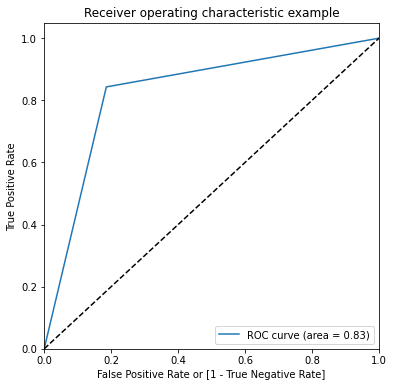

(array([0.        , 0.18559189, 1.        ]),
 array([0.        , 0.84313725, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [417]:
#AUC value graph

draw_roc(y_test, y_pred_test)

In [418]:
#Co-efficients of the model

lr_coeff = highsampled.coef_

lr_coeff[0]

array([ 2.51854189e-01,  3.14357430e-01, -7.44521676e-01, -7.26436973e-02,
       -3.64538464e-01, -1.42067012e+00,  8.38294023e-02,  2.14253093e-02,
        7.07239676e-02,  3.96967549e-01,  5.01485325e-02, -1.00982910e-01,
       -1.73446725e-01,  2.84002825e-01, -1.77563903e-01,  5.38733178e-02,
       -5.98088649e-02,  1.23911231e-01, -1.00188145e-01,  1.18358840e-01,
        3.80756562e-01, -3.84380565e-01, -7.58713666e-02,  8.34009368e-01,
       -1.23846957e-03,  1.42627379e-02,  2.01655398e-01,  3.17332057e-01,
       -2.11786983e-01,  3.67057824e-01, -5.26266039e-02, -8.41905674e-02,
       -8.86532240e-01, -4.63631485e-01,  1.03713333e-01,  3.68008830e-01,
       -1.28640768e-01, -1.66268851e-01, -2.80356475e-01, -1.02766313e-01,
       -1.61301773e-02,  3.38676291e-03, -2.72181599e-01, -1.68784045e-01,
       -7.76929854e-02, -4.56759069e-02,  8.82114662e-02,  9.88025091e-04,
       -1.74212309e-01, -1.40204758e-01, -3.11873685e-03, -4.39661445e-02,
       -2.22022690e-01, -

In [419]:
#Creating Dataframe

var_coeff = pd.DataFrame(columns=['var', 'co-eff'])

var_coeff

,var,co-eff


In [420]:
#Appending variable name & Co-effs

for i, j in zip(X.columns, lr_coeff[0]):
    var_coeff.loc[len(var_coeff.index)] = [i, j]

In [421]:
# Top15 co-efficients

top15 = var_coeff.sort_values(by='co-eff', ascending=False).head(15)

top15

,var,co-eff
117,og_others_derived_aug,1.310787
23,std_og_t2m_mou_7,0.834009
122,loc_ic_mou_derived_aug,0.485172
120,loc_ic_t2m_mou_derived_aug,0.484010
149,fb_user_derived_aug,0.472169
134,last_day_rch_amt_derived_aug,0.458183
127,total_ic_mou_derived_aug,0.424952
9,roam_og_mou_7,0.396968
20,std_og_t2t_mou_6,0.380757
35,total_og_mou_7,0.368009


In [422]:
#collecting top 15 variables
top15_vars = list(top15['var'])

top15_vars

['og_others_derived_aug',
 'std_og_t2m_mou_7',
 'loc_ic_mou_derived_aug',
 'loc_ic_t2m_mou_derived_aug',
 'fb_user_derived_aug',
 'last_day_rch_amt_derived_aug',
 'total_ic_mou_derived_aug',
 'roam_og_mou_7',
 'std_og_t2t_mou_6',
 'total_og_mou_7',
 'isd_og_mou_7',
 'std_og_mou_7',
 'arpu_2g_7',
 'arpu_7',
 'max_rech_amt_7']

# Modelling Logistic Regression with top15 variables

In [423]:
#Converting to DataFrame

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [424]:
#Extracting top 15 variables for train & test set

X_train = X_train.loc[:, top15_vars]
X_test = X_test.loc[:, top15_vars]

In [425]:
# Fitting on LogisticRegression
lr_fin = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train, y_train)

#Predicting model on X_test
y_pred_test = lr_fin.predict(X_test)

#Checking Confusion matrix
metrics.confusion_matrix(y_test, y_pred_test)

array([[6392, 1895],
       [ 153,  561]])

In [426]:
#  Checking Recall score for test data

print('Recall score for Test: ', round(metrics.confusion_matrix(y_test, y_pred_test)[0][0]/(metrics.confusion_matrix(y_test, y_pred_test)[0][0]+metrics.confusion_matrix(y_test, y_pred_test)[1][0]), 2))

Recall score for Test:  0.98


In [427]:
# Predicting X_train
y_pred_train = lr_fin.predict(X_train)

#Checking Confusion matrix
metrics.confusion_matrix(y_train, y_pred_train)

array([[14736,  4537],
       [  439,  1288]])

In [428]:
# Checking Recall score for train data

print('Recall score - Train: ', round(metrics.confusion_matrix(y_train, y_pred_train)[0][0]/(metrics.confusion_matrix(y_train, y_pred_train)[0][0]+metrics.confusion_matrix(y_train, y_pred_train)[1][0]), 2))

Recall score - Train:  0.97


# Top variables in Telecom churn

In [429]:
# Top 15 variables

top15_vars

['og_others_derived_aug',
 'std_og_t2m_mou_7',
 'loc_ic_mou_derived_aug',
 'loc_ic_t2m_mou_derived_aug',
 'fb_user_derived_aug',
 'last_day_rch_amt_derived_aug',
 'total_ic_mou_derived_aug',
 'roam_og_mou_7',
 'std_og_t2t_mou_6',
 'total_og_mou_7',
 'isd_og_mou_7',
 'std_og_mou_7',
 'arpu_2g_7',
 'arpu_7',
 'max_rech_amt_7']

**derived_aug - implies the usage difference in average of normal phase(6, 7 month) and churn phase(8th month)**

# Boxplot for Key variables in Top 15 variable

<AxesSubplot:xlabel='churn', ylabel='loc_ic_mou_derived_aug'>

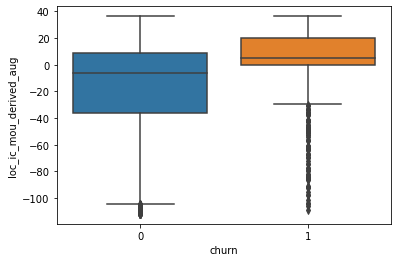

In [430]:
#Boxplot between churn & loc_ic_mou_derived_aug

sns.boxplot(x='churn', y='loc_ic_mou_derived_aug', data= tele_hvalue[
(tele_hvalue['loc_ic_mou_derived_aug'] >= tele_hvalue['loc_ic_mou_derived_aug'].quantile(0.1)) &
(tele_hvalue['loc_ic_mou_derived_aug'] <= tele_hvalue['loc_ic_mou_derived_aug'].quantile(0.7))
])

**Drop in usage of Local incoming minutes of usage implies a high possibility of churn**

<AxesSubplot:xlabel='churn', ylabel='loc_ic_t2m_mou_derived_aug'>

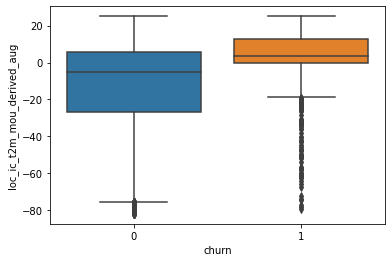

In [431]:
#Boxplot between churn & loc_ic_t2m_mou_derived_aug

sns.boxplot(x='churn', y='loc_ic_t2m_mou_derived_aug', data= tele_hvalue[
(tele_hvalue['loc_ic_t2m_mou_derived_aug'] >= tele_hvalue['loc_ic_t2m_mou_derived_aug'].quantile(0.1)) &
(tele_hvalue['loc_ic_t2m_mou_derived_aug'] <= tele_hvalue['loc_ic_t2m_mou_derived_aug'].quantile(0.7))
])

**Drop in usage of Local incoming minutes in Operator T to other operator mobile of usage implies a high possibility of churn**

<AxesSubplot:xlabel='churn', ylabel='last_day_rch_amt_derived_aug'>

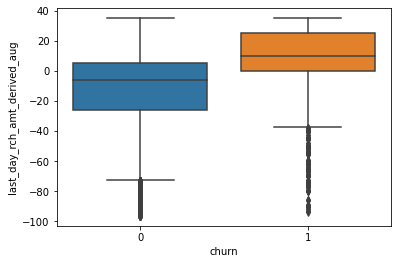

In [432]:
#Boxplot between churn & last_day_rch_amt_derived_aug

sns.boxplot(x='churn', y='last_day_rch_amt_derived_aug', data= tele_hvalue[
(tele_hvalue['last_day_rch_amt_derived_aug'] >= tele_hvalue['last_day_rch_amt_derived_aug'].quantile(0.1)) &
(tele_hvalue['last_day_rch_amt_derived_aug'] <= tele_hvalue['last_day_rch_amt_derived_aug'].quantile(0.7))
])

**Drop in last day recharge amount implies a high possibility of churn**

<AxesSubplot:xlabel='churn', ylabel='total_ic_mou_derived_aug'>

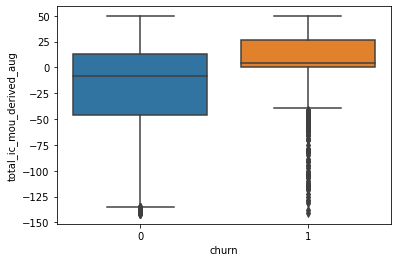

In [433]:
#Boxplot between churn & total_ic_mou_derived_aug

sns.boxplot(x='churn', y='total_ic_mou_derived_aug', data= tele_hvalue[
(tele_hvalue['total_ic_mou_derived_aug'] >= tele_hvalue['total_ic_mou_derived_aug'].quantile(0.1)) &
(tele_hvalue['total_ic_mou_derived_aug'] <= tele_hvalue['total_ic_mou_derived_aug'].quantile(0.7))
])

**Drop in total incoming minutes of usage in later months implies a high possibility of churn**

## Recommentation:

### Out of the top 15 variables, it's clear that
### ~ Incoming usage plays major role in predicting Churn

# Thank you 